# Singel channel source separation
The real world application we want to study in this project is, as the title sugests, single channel source separation. This is for example used to seperate a combined image into two parts based on some given basises. In our case, these images will be a combination of the number one and zero. Therefore, we expect the separated images to be a zero and a one on their own. However, to be able to attack this problem, we first need to examine the properties of a few matrices, and also the theory behind the method in question.

## Task 1 
### a)

For a matrix $A\in \mathbb{R}^{2x3}$, a vector $x\in \mathbb{R}^3$ and a vector $y\in \mathbb{R}^2$ we want to solve the system $Ax = b$. We can write this out as:
$$\begin{bmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
= \begin{bmatrix}
y_1 \\
y_2
\end{bmatrix}
$$
This can be written as:
$$\begin{bmatrix}
a_{11}x_1 + a_{12}x_2 + a_{13}x_3 \\
a_{21}x_1 + a_{22}x_2 + a_{23}x_3
\end{bmatrix}
= \begin{bmatrix}
y_1 \\
y_2
\end{bmatrix}
$$
If we want a system with no solutions, an option is
$$A_1 = \begin{bmatrix}
1 & 2 & 3 \\
1 & 2 & 3
\end{bmatrix}
\text{ with  } y_1 = \begin{bmatrix}
1 \\
-1
\end{bmatrix}
$$
Here we see that the left sides of the equations will be equal where as the right hand sides are different, so we can therefore not find a x-vector which satisfies both equations.

If we on the flip side want an infinte amount of solutions, an example is as follows:
$$A_2 = \begin{bmatrix}
1 & 2 & 3 \\
3 & 2 & 1
\end{bmatrix}
\text{ with  } y_2 = \begin{bmatrix}
1 \\
-1
\end{bmatrix}
$$
If we combine out two equations we get:
$$3x_1 +2x_2 + x_3 = -x_1 -2x_2 - 3x_3 $$
$$4x_1 + 4x_2 + 4x_3 = 0 $$
Here we can set one of the variables to zero, for instance $x_2$, which grants
$$4x_1 + 4x_3 = 0$$
$$ x_1 = -x_3$$
So one general solution is then $\begin{bmatrix}
k \\
0 \\
-k
\end{bmatrix} \text{for all k}\in \mathbb{R}$. Worth noting that you can switch any pair of elements in the final x-vector, and it still satisfies the linear system of equations.

### b)

Consider a matrix $A\in \mathbb{R}^{mxn}$ with $m < n$. What conclusions can we draw about $AA^T$ and $A^T A$?
Lets start with investigating symmetry. We know that for a symmetric matrix, the relation $A = A^T$ is satisfied, so lets check this.
Firstly $(AA^T)^T = (A^T)^T A^T = AA^T $ and secondly
$(A^TA)^T = A^T(A^T)^T = A^TA $. This means that both $AA^T$ and $A^TA$ are symmetric matrices. 

Furthermore, we want to know whether they are positve semi definite or not. This is a property which is fulfilled if $x^TAx\geq0$. For our matrices we get:
$$ x^TAA^Tx \geq0  \qquad x^TA^TAx \geq0$$
$$ x^TA(x^TA)^T \geq0 \qquad (Ax)^TAx \geq0 $$
$$ \|x^TA\|^2 \geq0 \qquad \|Ax\|^2\geq0 $$
We clearly see that this is correct, because the norm of a matrix is always greater or equal to zero. Hence, both $AA^T$ and $A^T A$ are positive semi definite. When it comes to invertibility we know that a matrix is only invertible if and only if its rank is equal to the dimension. It is known that $A$ has full rank and that its dimension is $mxn$ with $m < n$. Since it is known that $ \text{rank}(AB) \leq \text{min}(\text{rank}(A), \text{rank}(B))$, the rank of $A^TA$ is at max $m$ while its dimension is $nxn$, so $A^TA$ is not invertible. For $AA^T$ I found a proof at Statlect(https://www.statlect.com/matrix-algebra/matrix-product-and-rank) which states that given a $KxL$ matrix $B$ with rank $L$ and $K \geq L$, it is known that $B^TB$ has full rank. Since our $A$ matrix is wide while the $B$ matrix is tall, we can swap out $B$ with $A^T$ and $B^T$ with $A$. This means that the product $AA^T$ has full rank, and is therefore invertible.


### c)

We now want to find the $x$-value with the minimal norm from the Lagrange function. To do this we must first calculate the different parial derivatives of the Lagrange function
$$ L(x, \lambda)= x^Tx + \lambda^T(Ax-y), \lambda \in \mathbb{R}^n $$  
$$ L(x, \lambda)= \|x\|^2 + \lambda^TAx - \lambda^Ty $$
The partial derivative of x is then
$$ \nabla_xL(x, \lambda) = 2x + A^T\lambda$$
This is because $\frac{d}{dx}\|x\|^2 = 2x$ and $\frac{d}{dx}d^Tx = d$ which means $\frac{d}{dx}\lambda^TAx = A^T\lambda$.
We then need the partial derivative with respect to $\lambda$
$$ \nabla_{\lambda}L(x, \lambda) = \nabla_{\lambda} \lambda^T(Ax - y) = \nabla_{\lambda} \lambda^Tb, \qquad b = Ax - y$$
$$ \nabla_{\lambda} \lambda^Tb = b = Ax-y $$
So $ \nabla_{\lambda}L(x, \lambda) = Ax - y $. To then find the minima we need to put both the partial derivatives to zero, and solve the equations.
$$ Ax - y = 0 \text{ and }2x + A^T\lambda = 0 \rightarrow x = \frac{A^T\lambda}{2} $$
We then combine this with the equations to find an expression for $\lambda$:
$$ AA^T\lambda = 2y \rightarrow \lambda = 2(AA^T)^{-1}y $$
We then combine this with the expression for $x$ and get
$$ x = \frac{A^T2(AA^T)^{-1}y}{2} = A^T(AA^T)^{-1}y $$
Since this $x$ is the minimal $x$-value, we can then write $ x_{min} = A^T(AA^T)^{-1}y $

### d)

We now want to rewrite the equation above with the correlation $ A^T = QR $.
$$ x_{min}=A^T(AA^T)^{-1}y = QR(R^TQ^TQR)^{-1}y = QR(R^TR)^{-1}y = QRR^{-1}R^{-T}y = QR^{-T}y $$
Above I used the fact that $Q^TQ=I$ because $Q$ is orthogonal and that $R$ multiplied with its inverse is the identity matrix.

To find $x_{min}$ we then want to find a $Q$ and $R$ such that $A^T = QR$, as is our correlation above. We then want $Q$ to be orthogonal and $R$ to be upper trapezoidal. To do this we need to find the QR-decomposition, and I will do that using Gram-Schmidt. In the algorithm we need the columns of $A$, so to access them easier I transform $A$ and then just transform $Q$ at the end aswell.


In [1]:
#Imports for the entire project
import numpy as np
import scipy.linalg
import time
import random
import matplotlib.pyplot as plt

def QR_decomposition(A): #Only works when m is greater or equal to n, where m is the length of a column
    A = np.copy(A.T)
    
    #Define constants
    m = len(A[0])
    n = len(A)    
    
    #Calculates the initial values
    u0 = A[0]
    q0 = u0 / np.linalg.norm(u0)
    Q_T = np.zeros((n, m))
    Q_T[0] = q0 
    
    #Creates an empty 2D array
    R = np.zeros((n, n))
    
    #Iterates through the matrix
    for i in range(1, n):
        ak = A[i]
        uk = np.copy(ak)
        for j in range(0, i ):
            uk -= np.inner(ak, Q_T[j]) * Q_T[j] 
        qk = uk / np.linalg.norm(uk)
        Q_T[i] = qk
    
    #Calculates the R based on Q and the weights
    for i in range(0, n):
        for j in range(i, n):
            R[i][j] = np.inner(A[j], Q_T[i] ) 
    return (Q_T).T, R

#Test
A=np.array([[1, 1, 0],
  [1, 0, 1],
  [0, 1, 1]], dtype = "float64")

Q, R =QR_decomposition(A)
print("Q @ Q.T:")
print(Q@Q.T)
print("-------------------------------------")
print("R:")
print(R)
print("-------------------------------------")
B = Q @ R
print("Q @ R:")
print(B)

Q @ Q.T:
[[ 1.00000000e+00 -2.19098475e-16  2.50753550e-16]
 [-2.19098475e-16  1.00000000e+00  4.39774161e-17]
 [ 2.50753550e-16  4.39774161e-17  1.00000000e+00]]
-------------------------------------
R:
[[1.41421356 0.70710678 0.70710678]
 [0.         1.22474487 0.40824829]
 [0.         0.         1.15470054]]
-------------------------------------
Q @ R:
[[ 1.00000000e+00  1.00000000e+00  4.02426802e-17]
 [ 1.00000000e+00 -1.81125232e-16  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  1.00000000e+00]]


We see from the test above that $QQ^T = I$ because the elements with $10^{-16}$ is practically zero, it is just limited by the level of precision. Furthermore, $R$ is upper trapezoidal and we also see that $QR$ reconstructs our initial matrix A. So the implementation is at least sufficient for this example. 

### e)

Since calculating the inverse of $R^T$ is quite costly, we would rather avoid this. Therefore, we want to find $x_{min}$ without using the inverse.
$$ x_{min} = QR^{-T}y$$
$$ Q^Tx_{min} = IR^{-T}y $$
$$ R^TQ^Tx_{min} = y $$
Here we can let $ z = Q^Tx_{min}$ and we then get $ R^Tz = y $ which we can solve with forward substitution. We then get $ Q^Tx_{min} = z $ and to find $ x_{min} $ we just need to multiply with $Q$, so $ x_{min} = Qz$.

In the code below I have implemented this method.

In [2]:
def find_x_min(Q, R, y):
    z = scipy.linalg.solve_triangular(R.T, y, lower=True)
    x = Q @ z
    return x

### f)

The two functions below are from the code which was handed out, and they are used to create a linear system with $A$, $x$ and $y$.

In [3]:
def generate_A(m,n):
    """
    Generates m times n with correlated columns.
    Input:
        m: int, first dimension of A
        n: int, second dimension of A
    output:
        A: (m,n) array
    """

    cov_eigvecs = np.random.uniform(-1.0,1.0,(m,m))
    cov = cov_eigvecs.T @ cov_eigvecs
    v = np.sqrt(np.diag(cov))
    outer_v = np.outer(v, v)
    corr = cov / outer_v
    corr[cov == 0] = 0
    chol = scipy.linalg.cholesky(corr, lower=True) 
    A = np.random.normal(0, 1.0,(m,n))
    A = np.dot(chol, A)
    return A


m = 2048
n = 8096

A = generate_A(m,n)

N = 100 # Number of test data we want to generate

# Generate solutions X columnwise, X[:,i] to access i-th vector
X = np.random.normal(0.0,1.0,(A.shape[1],N))

# Generate left hand sides Y columnwise Y[:,i] to access lhs
Y = np.dot(A,X)

# Doublecheck shapes
print(X.shape) # Expect (n,N)
print(Y.shape) # Expect (m,N)

(8096, 100)
(2048, 100)


As we now have our $A$ and $y$, and also our actual solution $x$, we can test our implementation against the pre-existing functions in numpy. We are now interessted in primarily two parameters, the error and the computation time. For the time we are interested in both the computations we do just once, and then separatly the time to calculate the hundred minimal x-values.

In [4]:
#Test for np.linalg.solve
error = np.zeros(100)

time0 = time.time()
A_T = A.T
B = A @ A_T
time1 = time.time()
print("To calculate the matrices took " + str(round(time1 - time0, 3)) + " seconds")

time0 = time.time()
for i in range(0, 100):
    z = np.linalg.solve(B, Y[:, i])
    x_min = A_T @ z
    error[i] = np.linalg.norm(x_min - X[:, i])
          
time1 = time.time()
print("The time to calculate the x for the 100 different y is " + str(round(time1 - time0, 3)) + " seconds")

To calculate the matrices took 0.946 seconds
The time to calculate the x for the 100 different y is 23.057 seconds


In [5]:
#Test with QR

time0 = time.time()
Q, R = QR_decomposition(A.T)
time1 = time.time()
print("To calculate the decomposition took " + str(round(time1 - time0, 3)) + " seconds")

time0 = time.time()

X_new = find_x_min(Q, R, Y)

time1 = time.time()

print("The time to calculate the x for the 100 different y is " + str(round(time1 - time0, 3)) + " seconds")

To calculate the decomposition took 76.151 seconds
The time to calculate the x for the 100 different y is 0.172 seconds


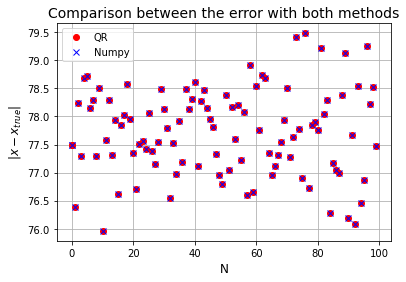

The norm of the solution x0: 89.731


In [6]:
plt.figure()
for i in range(0, 100):
    x_val = np.linalg.norm(X_new[:, i] - X[:, i])
    if ( i == 0):
        plt.plot(i, x_val, 'ro', label="QR")
        plt.plot(i, error[i], 'xb', label = "Numpy")
        
    plt.plot(i, x_val, 'ro')
    plt.plot(i, error[i], 'xb')

plt.grid()
plt.title("Comparison between the error with both methods", size = 14)
plt.xlabel("N", size = 12)
plt.ylabel("$ \|x - x_{true}\| $", size = 12)
plt.legend()
plt.show()

print("The norm of the solution x0: " + str(round(np.linalg.norm(X[:, 0]), 3)))

From the time tests above we clearly see that numpy.linalg is quicker overall in this scenario. However, our $QR$ method is actually a lot quicker at calculating the different $x_{min}$-values after the initial matrices are computed. This means that if we are calculating $n>>100$ different systems, the $QR$ method would be quicker than numpy.linalg. When it comes to the error, it is obvious from the plot above that the methods are totaly equivalent in terms of the deviation from the actual solution. It is also clear that the average error is more than $80$% off the norm of an actual solution $x_0$, so the relative error is quite large. Thus, our reconstuction is not very good.


## Task 2
### a)


We are now interested in the Tihkonov regularisation which uses the fact that $x_r = \text{arg min} \|Ax - y\|^2 \text{ for all } x\in \mathbb{R}^n$. We then introduce a weight $\mu$ greater than 0 and get the following expression: $$T(x) = \|Ax - y\|^2 + \mu \|x\|^2  $$
This is the expression we will examine further, and first off we will see what happens if $\nabla_xT(x) = 0$.
$$ \nabla_xT(x) = 2A^TAx - 2y^TA + 2\mu x = 0 $$
$$ y^TA = A^TAx + \mu x $$
$$ y^TA = (A^TA + \mu I)x $$
$$ A^Ty = (A^TA + \mu I)x $$
Now lets take a look at $(A^TA + \mu I)$, and start with if it is semi positive definite.
$$ z^T(A^TA + \mu I)z \geq 0  $$
$$ z^TA^TAz + z^T\mu I z \geq0 $$
$$ (Az)^TAz + \mu z^Tz \geq0  $$
$$ \|Az\|^2 + \mu \|z\|^2 \geq0 $$
Since $\mu>0$ and the norm of a matrix is greater or equal to zero, the expression above is correct and $(A^TA + \mu I)$ is semi positive definite and thus also invertible.

## b)

Lets now look at this in correlation with the singular value decomposition. This means that we can write $A = U\Sigma V^T$ where $U$ and $V$ are unitary and $\Sigma $ is a diagonal matrix with the eigenvalues of A.
$$ A^Ty = (A^TA + \mu I)x  $$
$$ V\Sigma U^T y = (V\Sigma U^TU\Sigma V^T + \mu I)x $$
$$ V\Sigma U^T y = (V\Sigma^2V^T + \mu VV^T)x $$
$$ V\Sigma U^T y = (V\Sigma^2V^T + V\mu I V^T)x $$
$$ V\Sigma U^T y = (V(\Sigma^2 +\mu I) V^T)x $$
$$ \Sigma U^T y = (\Sigma^2 +\mu I) V^Tx $$
$$ DU^T y = V^T x $$
$$ VDU^T y = x $$
Where $D$ is a diagonal matrix with $\frac{\sigma_i}{\sigma_i^2 + \mu}$ on the diagonal.

## c)

The next step is to implement our solver. So given the elements of the singular value decomposition, $\mu$ and $y$, the desired $x$ can be calculated.

In [7]:
def Tikhonov_solveSVD(V, S, Ut, mu, y): #S is a vector with only the elements which would have been on the diagonal
    #To avoid change in the input vector S
    S = np.copy(S)
    
    #Replaces the values in S with the corresponding value in the matrix D from above
    for i in range(len(S)):
        S[i] = S[i] / (S[i]**2 + mu)
    
    x = V@np.diag(S) @Ut@y #Utilises np.diag(S) which just creates a diagonal matrix with S_i on the diagonal in row i
    return x

#Test
M = np.array([[1, 0, 0, 0],
             [0, 2, 0, 0],
             [0, 0, 1, 0]], dtype="float64")
U, S, Vt = np.linalg.svd(M, full_matrices = False)
print(U@np.diag(S)@Vt)

y = np.array([1, 1, 1])
print(Tikhonov_solveSVD(Vt.T, S, U.T, 0.001, y.T))

[[1. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 1. 0.]]
[0.999001   0.49987503 0.999001   0.        ]


The test above seems correct, as the intuitive understanding when $\mu$ is close to zero, is approximatly the same as just solving the system.

## d)


Its now time to explore how different values of $\mu$ effect our solution. This can be done by creating a matrix $A$ with a vector $y$ and a corresponding solution $x$, and solving this system with many different values of $\mu$. Since the solution $x$ is known, the error can be calculated with $e_i = \| x_i - x_{true}\|$. The $x_i$ can be calculated in different ways, and the two which will be compared below are either a combo of SVD and Tikhonov or numpys own implemented solver. I had some memory issues with $m = 2048$ and $n = 8096$, so i halved them both in the code below.

To calculate the decomposition took 4.156 seconds
The time to calculate the x for the 100 different mu is 42.403 seconds


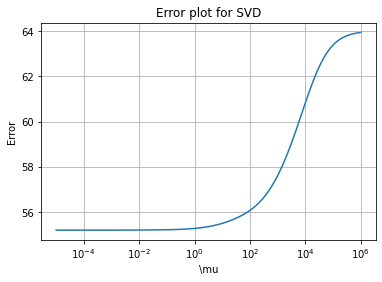

In [8]:
#With SVD and Tikhonov
m = 1024
n = 4048
N = 100

#To create the system
A = generate_A(m,n)
X = np.random.normal(0.0,1.0,(A.shape[1],1)).T[0].T
Y = (np.dot(A,X)).T

#Initialize the values of interest
mu = np.logspace(6, -5, N)
error_array = np.zeros(N)

#Finds the desomposition
time0 = time.time()
U, S, Vt = np.linalg.svd(A, full_matrices = False)
V = Vt.T
Ut = U.T
time1 = time.time()
print("To calculate the decomposition took " + str(round(time1 - time0, 3)) + " seconds")

#Calculates x for the N different mu's and takes the norm between x_i and the actual solution X
time0 = time.time()
for i in range(0, N):
    x = Tikhonov_solveSVD(V, S, Ut, mu[i], Y)
    error_array[i] = np.linalg.norm(x-X)
time1 = time.time()
print("The time to calculate the x for the 100 different mu is " + str(round(time1 - time0, 3)) + " seconds")

#plot
plt.figure()
plt.title("Error plot for SVD")
plt.plot(mu, error_array)
plt.xscale("log")
plt.grid()
plt.xlabel("\mu")
plt.ylabel("Error")
plt.show()

To calculate the matrices took 0.641 seconds
The time to calculate the x for the 10 different mu is 18.932 seconds


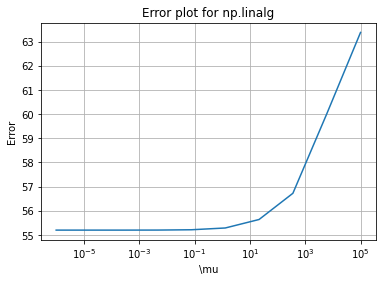

The norm of the solution x: 19.0


In [9]:
#With linalg.solve

#Initialize the values of interest
N = 10
mu2 = np.logspace(5, -6, N)
error_array2 = np.zeros(N)

#Calculate the proponents which dont depend on mu
time0 = time.time()
b = A.T @ Y
C = A.T @ A
time1 = time.time()
print("To calculate the matrices took " + str(round(time1 - time0, 3)) + " seconds")

#Calculates x for the N different mu's and takes the norm between x_i and the actual solution X 
time0 = time.time()
for i in range(0, N):
    x = np.linalg.solve(C + np.identity(n)*mu2[i], b)
    error_array2[i] = np.linalg.norm(x-X)

time1 = time.time()
print("The time to calculate the x for the " + str(N) +" different mu is " + str(round(time1 - time0, 3)) + " seconds")

#plot
plt.figure()
plt.title("Error plot for np.linalg")
plt.plot(mu2, error_array2)
plt.xscale("log")
plt.xlabel("\mu")
plt.grid()
plt.ylabel("Error")
plt.show()

print("The norm of the solution x: " + str(round(np.linalg.norm(X, 3))))

From the tests above it is clear that the error in the two methods are very similar, but it is worth noting that the sample size for np.linalg is much smaller. Furthermore, it is clear that the method with SVD is quicker per iteration, even though np.linalg is quicker with the given values, but it only computes the error for $1/10$ the number that our SVD does. Hence, the method with SVD is more computationally efficient. Another observation is that the error seems to be at its lowest for $\mu$ in the interval $[10^{-5}, 10^{-1}]$ where the norm is approximatly linear. However, no matter what $mu$ we choose, the error is always larger than the norm of $X$, which means our solutions are pretty much useless in this scenario.

## Task 3
### a)

Lets now consider a matrix $B = I - WW^T$ where $W$ is a matrix with pairwise orthonormal columns. This means that $WW^T \neq I$ but $W^TW = I$. The properties of interest are symmetry, positive semi-definitness and if it is a projection. Lets start with projection, which is fulfilled if $B^2 = B$. 
$$ B^2 = (I-WW^T)(I-WW^T) $$
$$ B^2 = I - WW^T - WW^T + WW^TWW^T $$
$$ B^2 = I - WW^T - WW^T + WIW^T $$
$$ B^2 = I - WW^T$$
So $B$ is a projection, what about symmetry?
It is clear that $I$ is symmetric and since $(WW^T)^T = WW^T$ it is clear that $WW^T$ is also symmetric. Hence, $B$ is the difference between two symmetric matrices which also makes $B$ symmetric. Furthermore, the eigenvalues are also of interest.
$$ Bv = \lambda v $$
$$ B^2v = \lambda B v $$
$$ Bv = \lambda \lambda v $$
$$ Bv = \lambda^2 v $$
Which means that both $\lambda$ and $\lambda^2$ is eigenvalues of $B$, so $\lambda^2 = \lambda$, and the only possible eigenvalues are zero and one.
When it comes to SPD, $z^TBz \geq 0$ must be shown to hold for every $z \in \mathbb{R}^n$. Since $B$ is normal, with the use of the spectral theorem, the following can be derived: $ B = Q\Lambda Q^T$ where $Q$ is orthogonal and $\Lambda$ has the eigenvalues of $B$ on the diagonal. Combining this gives the following:
$$  z^TBz \geq 0$$
$$ z^TQ\Lambda Q^Tz \geq 0 $$
Because all the eigenvalues of B are non-negative, we can then take the square root of $\Lambda$ and still only have real numbers.
$$ z^TQ\Lambda^{1/2} \Lambda^{1/2} Q^Tz \geq 0 $$
$$ (\Lambda^{1/2} Q^Tz)^T \Lambda^{1/2} Q^Tz \geq 0 $$
$$ \| \Lambda^{1/2} Q^Tz \|^2 \geq 0$$
The norm is greater or equal to zero by definiton, so $B$ is SPD. 

## b)


Its now time to implement our results so far on a real life problem with imaging. The particular problem is called single channel source separation. Our scenario will use two basises with images and try to seperate a combination of two pictures into the two original images. Our two basises consist of sixteen zeros or sixteen ones and are assumed to form orthogonal basises $W_0$ and $W_1$. For the following it is necessary to establish a few correlations: 

Firstly $A = [I \quad I]$, secondly
$B = \begin{bmatrix}
B_0 & 0 \\
0 & B_1
\end{bmatrix}$
where $B_i = I - W_iW_i^T$. Furthermore, define $x = \begin{pmatrix}
u \\
v
\end{pmatrix}$ where $u$ is a zero-image and $v$ is a one-image, so they are from different basises.
We can then solve this with the following Lagrangian similarly to in Task 1.
$$ L(x, \lambda) = \frac{1}{2}x^TBx + \lambda^T(Ax - y) $$
The first step is to calculate the respective gradients for $L(x, \lambda)$. Using the fact that $\nabla _xx^TCx = (C + C^T)x$ gives:
$$ \nabla_xL(x, \lambda) = \frac{1}{2}(B + B^T)x + A^T\lambda \text{ and } \nabla_{\lambda}L(x, \lambda) = Ax - y $$
Setting the two gradients equal to zero grants the following system:
$$ \begin{bmatrix}
\frac{1}{2}(B + B^T) & A^T \\
A & 0
\end{bmatrix}
\begin{bmatrix}
x \\
\lambda
\end{bmatrix}
= \begin{bmatrix}
0 \\
y
\end{bmatrix}
$$
Based on some of the correlations above, the system above can be rewritten. It is clear that $\frac{1}{2}(B + B^T) = B$ and that $A^T = \begin{bmatrix} I \\ I \end{bmatrix}$, the system can then be written as:
$$ \begin{bmatrix}
B_0 & 0 & I \\
0 & B_1 & I \\
I & I & 0
\end{bmatrix}
\begin{bmatrix}
u \\
v \\
\lambda
\end{bmatrix}
= \begin{bmatrix}
0 \\
0 \\
y
\end{bmatrix}
$$
Substituting for $B_0$ and $B_1$ then yields:
$$ \begin{bmatrix}
I - W_0W_0^T & 0 & I \\
0 & I - W_1W_1^T & I \\
I & I & 0
\end{bmatrix}
\begin{bmatrix}
u \\
v \\
\lambda
\end{bmatrix}
= \begin{bmatrix}
0 \\
0 \\
y
\end{bmatrix}
$$
The matrices above yields the following equations:
$$ B_0u + \lambda I = 0 $$
$$ B_1v + \lambda I = 0 $$
$$ u + v = y $$
The next step is to eliminate $\lambda$ from the system. This can be done by combining the first and second equations to $ B_0 u = B_1 v $. Rearanging the third equation into $ v = y - u $ can then be swapped with the y from the combined equation above. This gives:
$$ B_0 u = B_1 (y - u)  $$
$$ B_0 u = B_1y - B_1u $$
$$ (B_0 + B_1)u = B_1 y $$
$$ Cu = d $$
Where $C = (B_0 + B_1) $ and $d = B_1 y$. The final step is then to combine this to a numeric method, and test if it actually works. To do this I use the provided data and also some handed out code in the two code chunks below. The first cell creates 100 mixed images and prints two of the 100 images to see some examples.

(784, 100)


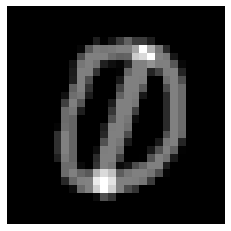

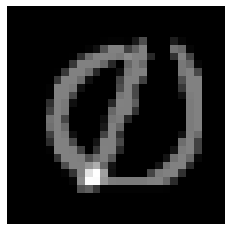

In [10]:
Mixes = np.load('Data/mixed.npy')
print(Mixes.shape) # Should be (784,100)

plt.imshow(Mixes[:,1].reshape((28,28)), cmap = 'gray')
plt.axis('off') # Removes the x and y axis to plot only the image
plt.show()

plt.imshow(Mixes[:,32].reshape((28,28)), cmap = 'gray')
plt.axis('off') # Removes the x and y axis to plot only the image
plt.show()

The chunck below loads the basises from the provided data and prints the first basis-image of $W_0$ and then the image of the product $W_0^TW_0$, which clearly resembles the identity matrix, which it is supposed to based on our assumptions.

(784, 16)
(784, 16)


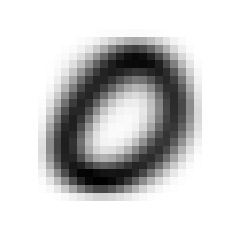

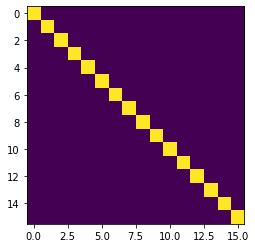

In [11]:
W0 = np.load('Data/W0.npy')
W1 = np.load('Data/W1.npy')
print(W0.shape) # Should be (784,16)
print(W1.shape) # Should be (784,16)

plt.imshow(W0[:,0].reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.show()

W0TW0 = np.dot(W0.T, W0)
plt.imshow(W0TW0)
plt.show()

Since we now have our actual data, the next step is the solver based on the theory from above.

In [12]:
def minimal_norm(B0, B1, y):
    C = B0 + B1
    d = B1 @ y
    u = np.linalg.solve(C, d)
    v = y - u
    return u, v

### d) 

Its now time to test the implementation on the provided data set of a hundrer images with the following basises.

The time to calculate the 100 channel separations was 2.018 seconds


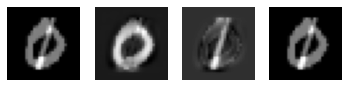

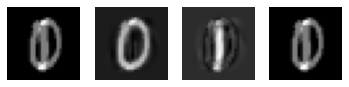

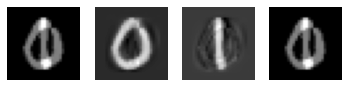

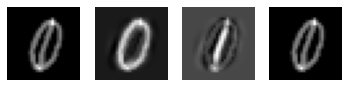

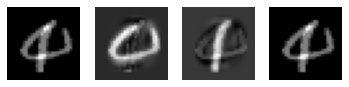

In [13]:
#Some constans and initialisation
num_im = len(Mixes[0]) #The number of images 
num = len(Mixes)       #The number of values in one image-vector
B0 = np.identity(num) - W0 @ W0.T
B1 = np.identity(num) - W1 @ W1.T
u_array = np.zeros((num_im, num))
v_array = np.zeros((num_im, num))

#Calculates the channel separation for the 100 combined images
time0 = time.time()
for i in range(0, num_im):
    u, v = minimal_norm(B0, B1, Mixes[:, i])
    u_array[i] = u
    v_array[i] = v
time1 = time.time()
print("The time to calculate the 100 channel separations was " + str(round(time1 - time0, 3)) + " seconds")

#test
for i in range(0, 50, 10):
    u = u_array[i]
    v = v_array[i]

    plt.subplot(141)
    plt.imshow(Mixes[:,i].reshape((28,28)), cmap = 'gray')
    plt.axis('off')

    plt.subplot(142)
    plt.imshow(u.reshape((28,28)), cmap = 'gray')
    plt.axis('off')

    plt.subplot(143)
    plt.imshow(v.reshape((28,28)), cmap = 'gray')
    plt.axis('off')

    plt.subplot(144)
    plt.imshow((u+v).reshape((28,28)), cmap = 'gray')
    plt.axis('off')

    plt.show()

The figures above are five specific examples where the picture on the left is our input, the combined picture. The next two columns are respectfully $u$ and $v$ and the last column is the reconstructed image from $u + v$. From the plots above I would argue that our method seems sound. The $u$ and $v$ match our initial image very well, even though the colors are a bit off, the positioning off the numbers is spot on. I also think it is likely that the difference in the gray-scale between images just stems from how the colormaps work. The process is also very fast with out given data, so that is a huge plus.

To conclude, I would say that the singel channel source separation worked well for our problem. The reconstructions are good and the runtime is short. However, some of the methods used earlier in the project performed suprisingly bad. In task 1 f) and task 2 d), the $x$-values we find are barely closer, or even worse, to the true solution than $x = 0$, which is very poor. On top off that, the runtime is also somewhat exstensive. 